In [84]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# gather information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
# check for total null values present
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
# deleting columns Product Category 2 & 3 as it will affect the analysis 
del df['Product_Category_2']
del df['Product_Category_3']

## Analysing Columns

In [7]:
# total unique customers
df['User_ID'].nunique()

5891

In [8]:
# total unique Products
df['Product_ID'].nunique()

3623

In [9]:
# total unique Gender
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
# total unique Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
# total unique City Category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
# total unique Occupation
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [16]:
# total unique product category 1
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [17]:
# total unique Marital status
df['Marital_Status'].unique()

array([0, 1])

In [18]:
# total amount purchased by all the customers
df['Purchase'].sum()

5017668378

## Analysing Gender 

In [19]:
# total male and female purchases
len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])

(405380, 132197)

<Axes: title={'center': 'Gender Ratio'}>

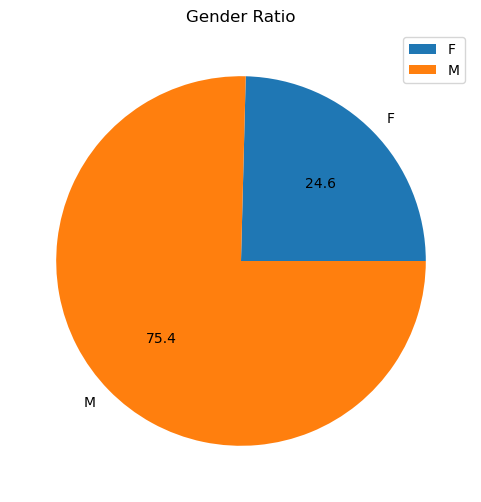

In [37]:
# Plot the gender ratio using pie chart
df.groupby('Gender').size().plot(kind = 'pie',
                                 autopct = '%.1f',
                                 figsize = (6,6),
                                 title = 'Gender Ratio',
                                 legend = True)

<Axes: xlabel='Gender'>

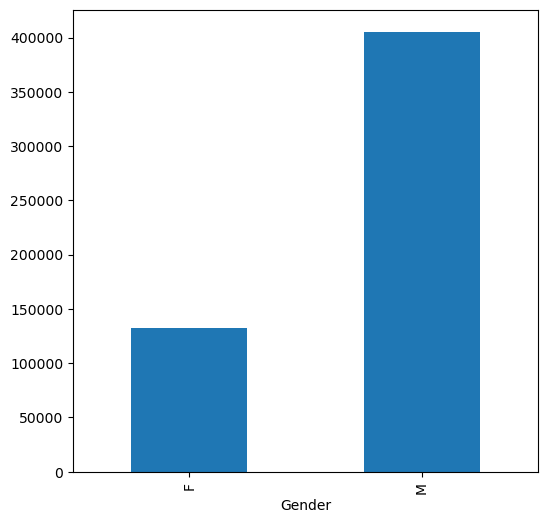

In [42]:
# plotting using bar chart
df.groupby('Gender').size().plot(kind = 'bar', figsize=(6,6))

<Axes: ylabel='Purchase'>

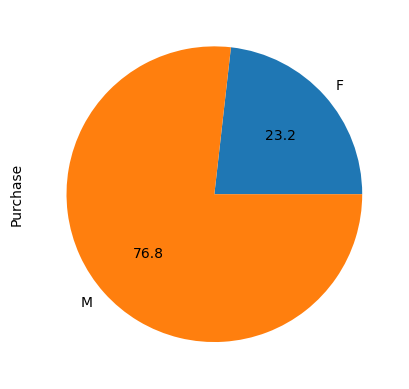

In [45]:
# total amount of purchases group by gender
df.groupby('Gender').sum()['Purchase'].plot(kind='pie', autopct='%.1f')

<Axes: ylabel='Purchase'>

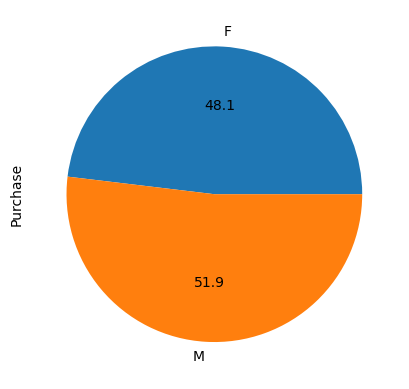

In [47]:
# average amount of purchases group by gender
df.groupby('Gender').mean(numeric_only=True)['Purchase'].plot(kind='pie', autopct='%.1f')

## Analysing Age

<Axes: title={'center': 'Product Distribution by Age'}, xlabel='Age'>

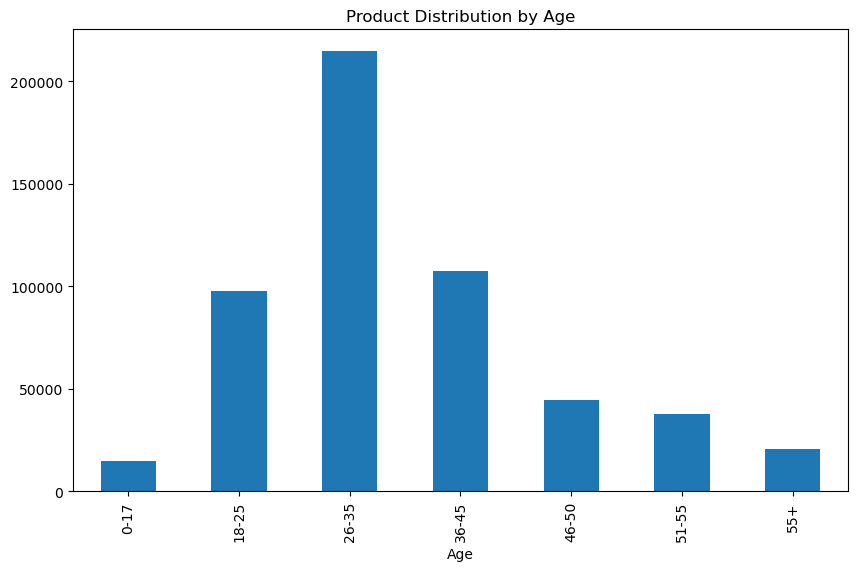

In [58]:
# product purchase distribution by age
df.groupby('Age').size().plot(kind='bar', figsize=(10,6), title='Product Distribution by Age')

In [52]:
# unique products sold by age
lst = []

for i in df['Age'].unique():
    lst.append([i , df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst, columns=['Age', 'Products'])

In [53]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

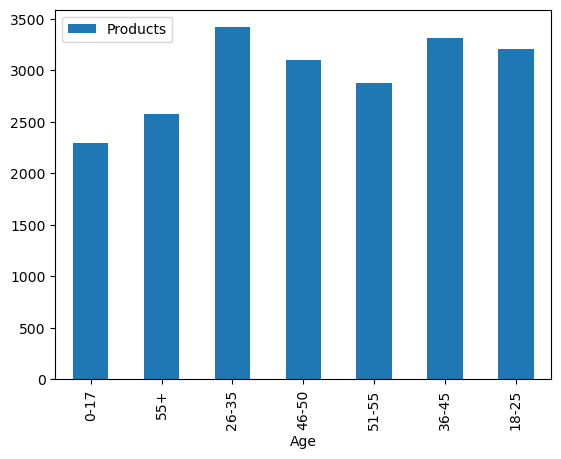

In [56]:
# plotting the data 
data.plot.bar(x='Age')

<Axes: title={'center': 'Amount Spent by Age'}, xlabel='Age'>

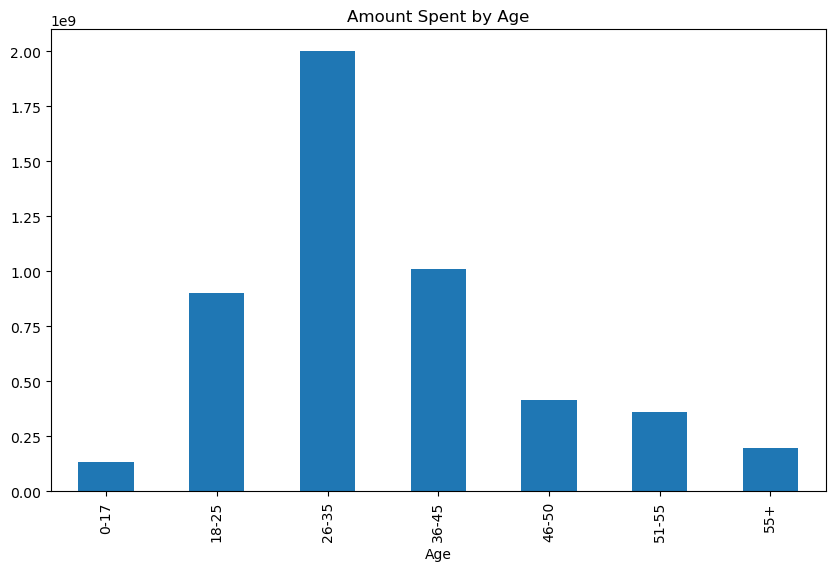

In [60]:
# purchase distribution by age
df.groupby('Age').sum()['Purchase'].plot(kind='bar', figsize=(10,6), title='Amount Spent by Age')

<Axes: ylabel='Purchase'>

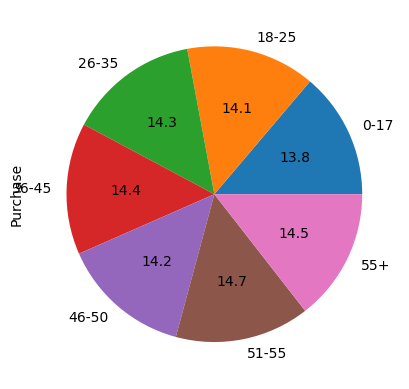

In [63]:
# average expenditure by age group
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind='pie',autopct='%.1f')

<Axes: >

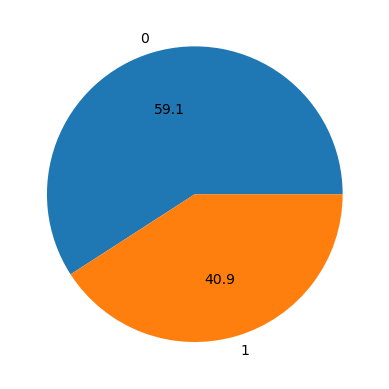

In [67]:
# average expenditure by age group
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%.1f')

## Multicolumn Analysis

<Axes: xlabel='Age', ylabel='count'>

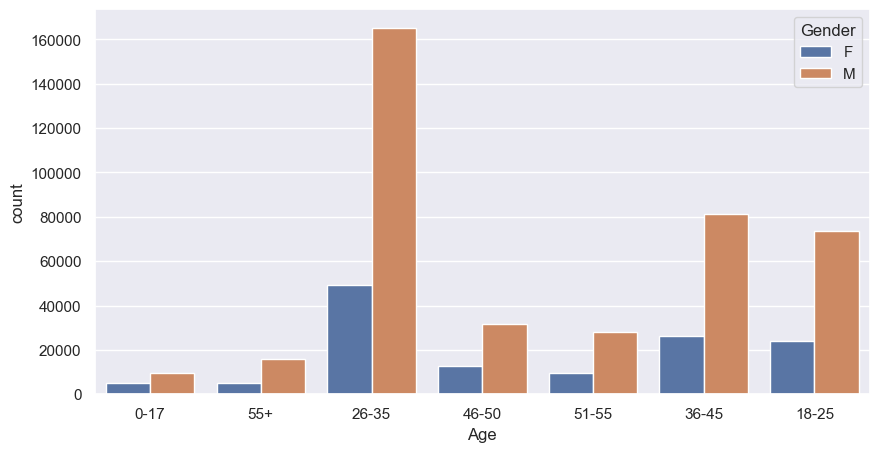

In [71]:
# product purchase distribution by age and gender
sns.set(rc = {'figure.figsize': (10,5)})
sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Gender', ylabel='count'>

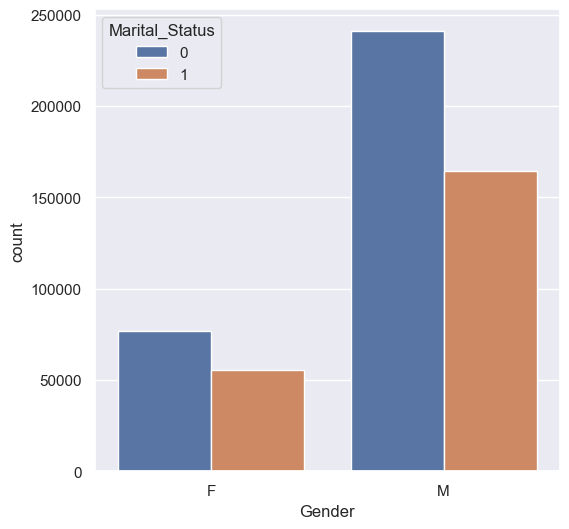

In [74]:
# product purchase distribution by Marital Status and gender
sns.set(rc = {'figure.figsize': (6,6)})
sns.countplot(x='Gender', hue='Marital_Status', data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

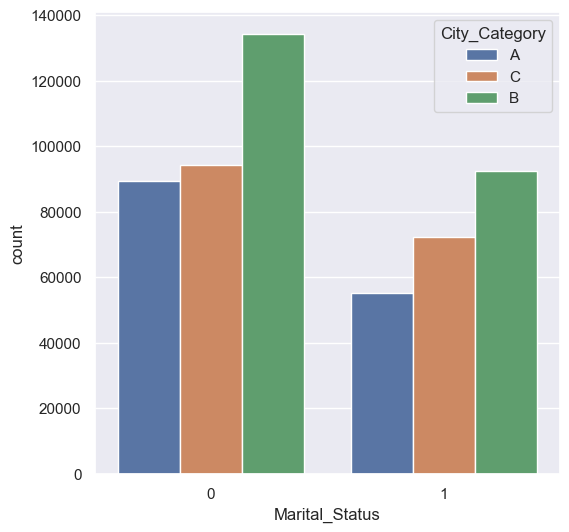

In [80]:
# product purchase distribution by Marital Status and City Category
sns.set(rc = {'figure.figsize': (6,6)})
sns.countplot(x='Marital_Status', hue='City_Category', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

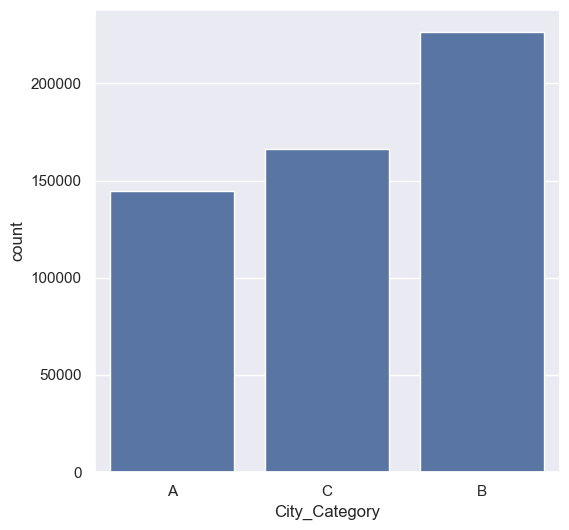

In [75]:
# products purchase by city category
sns.countplot(x = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

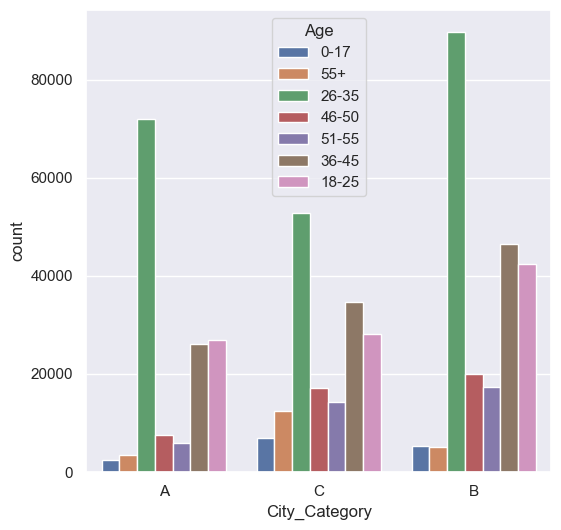

In [77]:
# products purchase by city & age
sns.countplot(x='City_Category', hue='Age', data=df)

<Axes: >

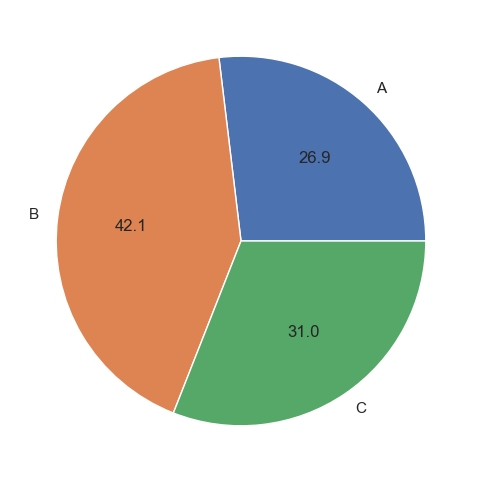

In [76]:
# pie chart for city category
df.groupby('City_Category').size().plot(kind='pie', autopct='%.1f')

<Axes: xlabel='City_Category', ylabel='count'>

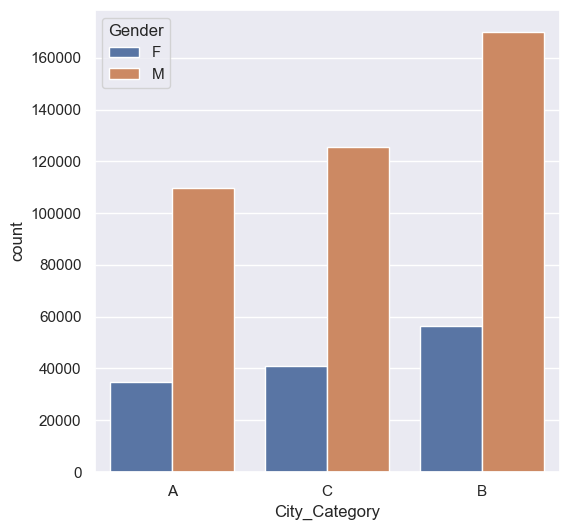

In [81]:
# purchase distribution by city category and gender
sns.countplot(x='City_Category', hue='Gender', data=df)

## Occupation and Product Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

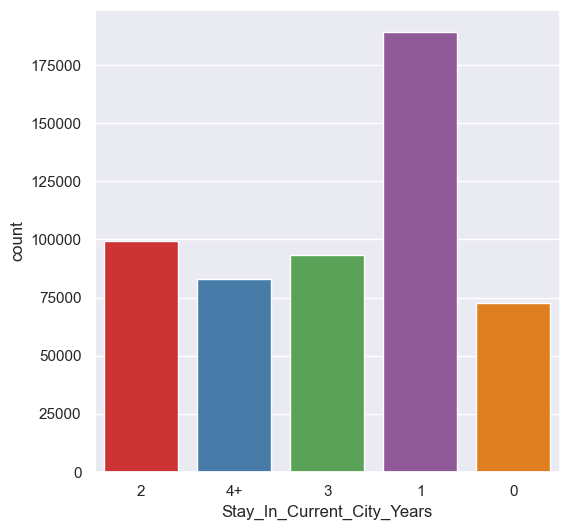

In [85]:
# purchases according to stay in city
sns.countplot(x = df['Stay_In_Current_City_Years'], palette='Set1')

<Axes: >

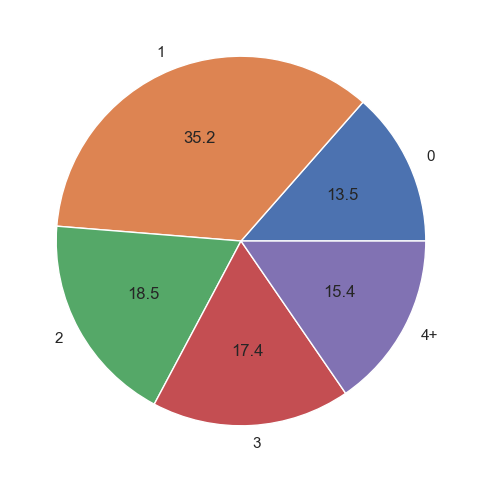

In [86]:
# Percentages of people for staying in current city
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

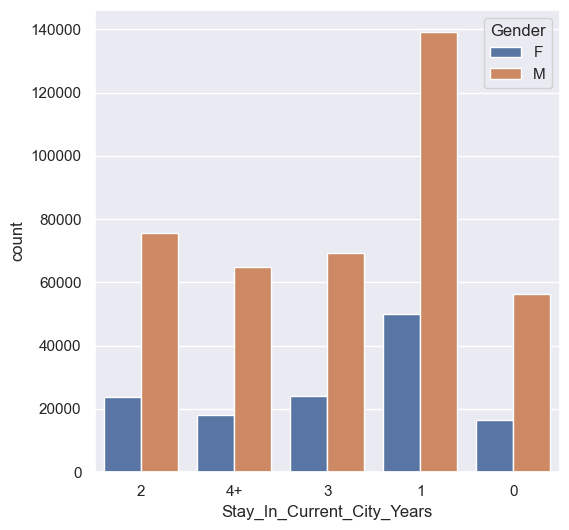

In [87]:
# people staying in city by genders
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

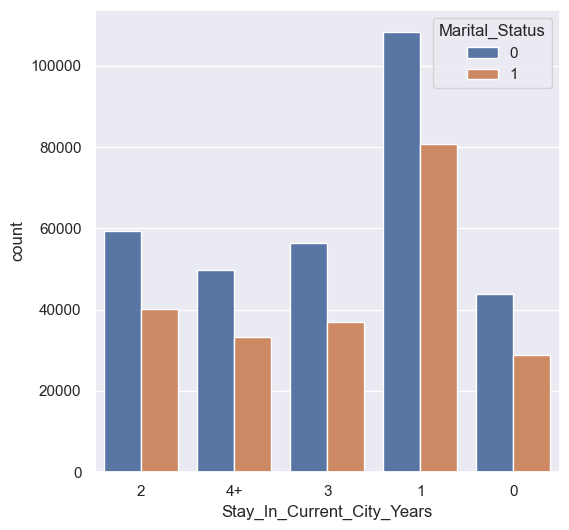

In [88]:
# people staying in current city in years by marital status
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

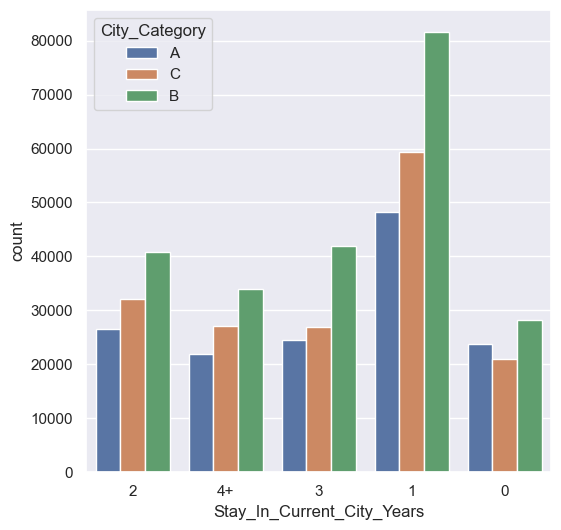

In [90]:
# people staying in current city from years by city category
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

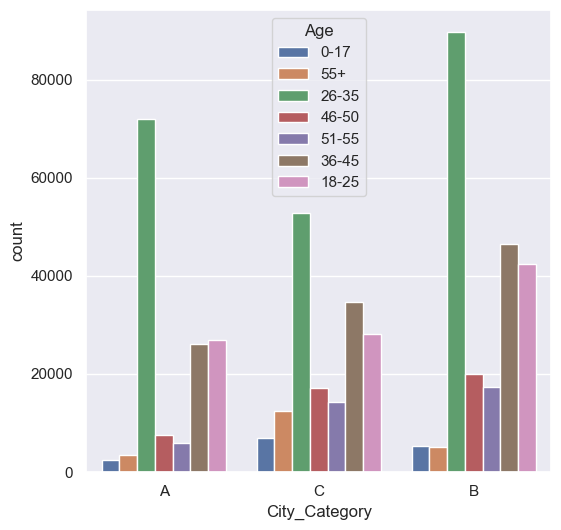

In [89]:
# people staying in current city from years by age group
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<Axes: xlabel='Occupation', ylabel='count'>

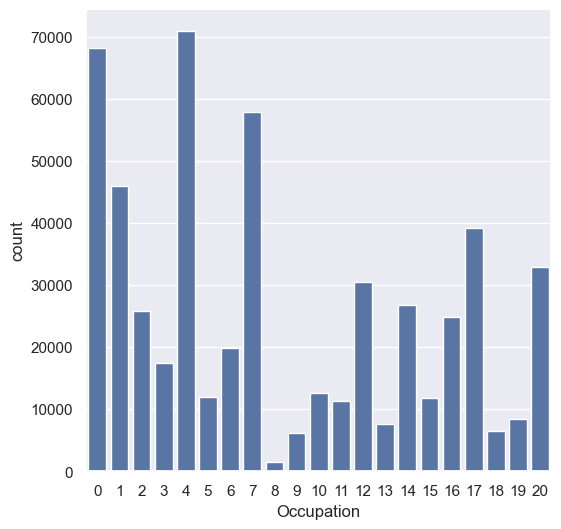

In [91]:
# purchases by occupation
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

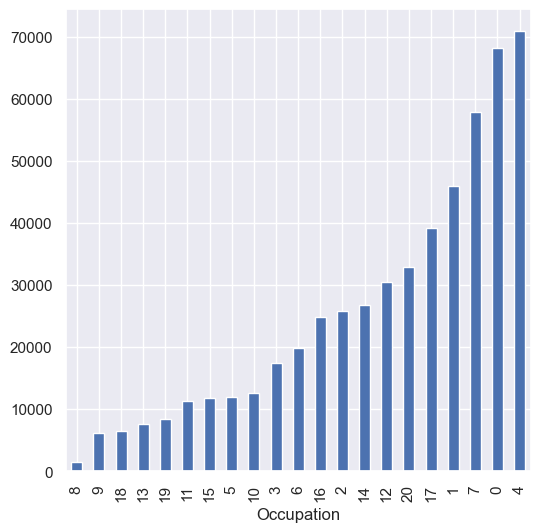

In [92]:
# sorting occupation by products purchases
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

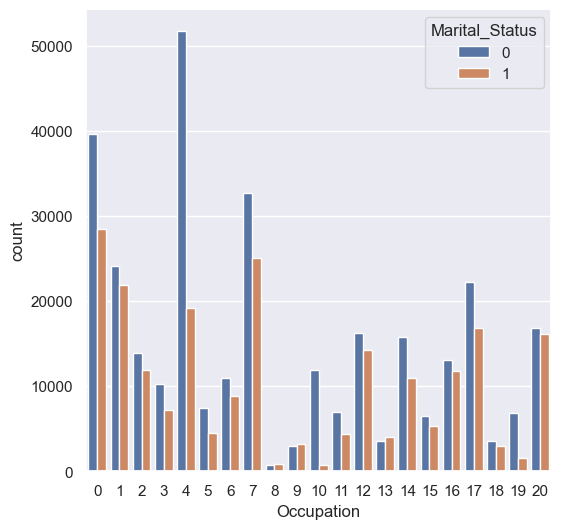

In [93]:
# occupation distribution by Marital Status
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

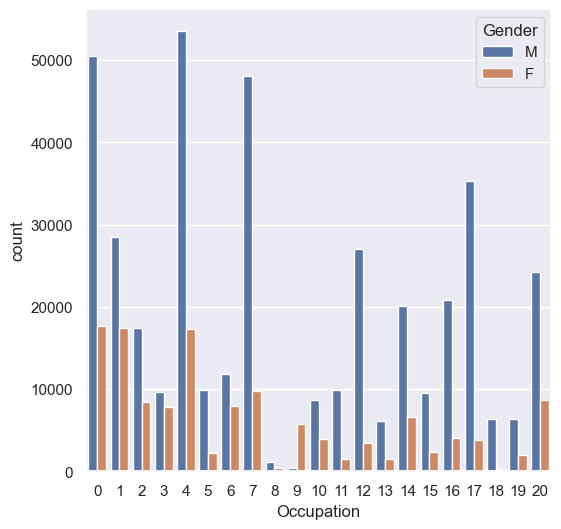

In [94]:
# occupation distribution by Gender
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

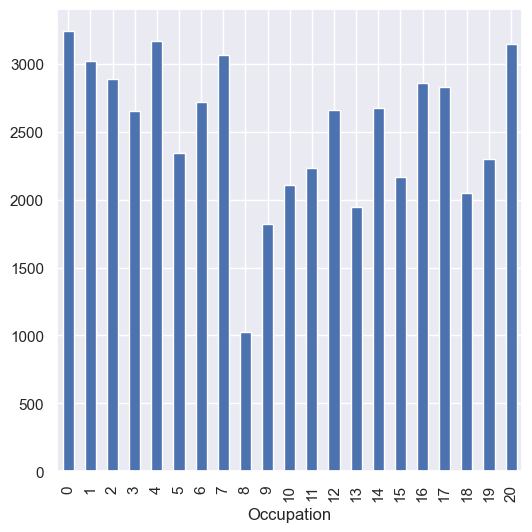

In [95]:
# occupation distribution by unique Product ID
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

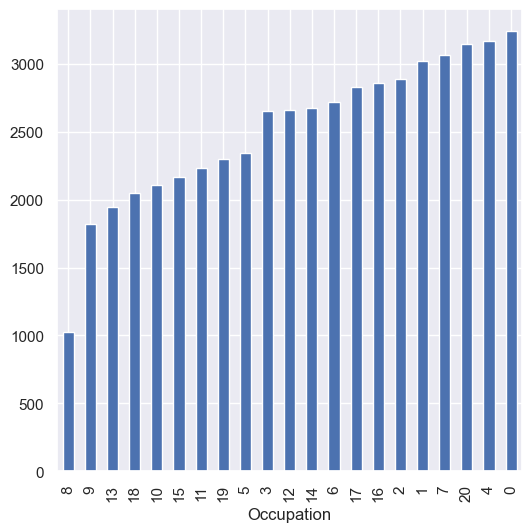

In [96]:
# sorted occupation distribution by unique product ID
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

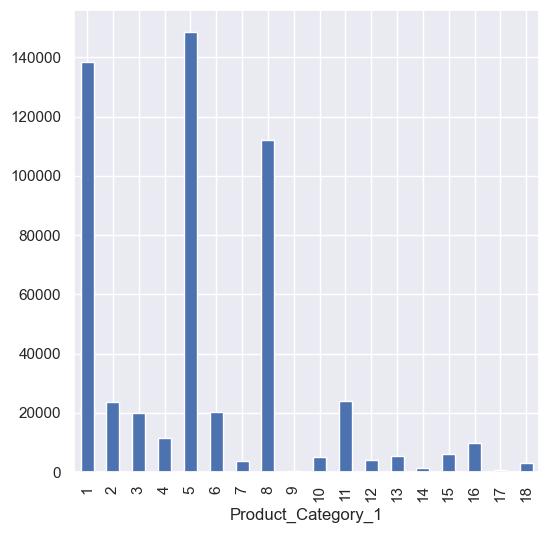

In [97]:
# Product Category 1 distribution
df.groupby('Product_Category_1').size().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

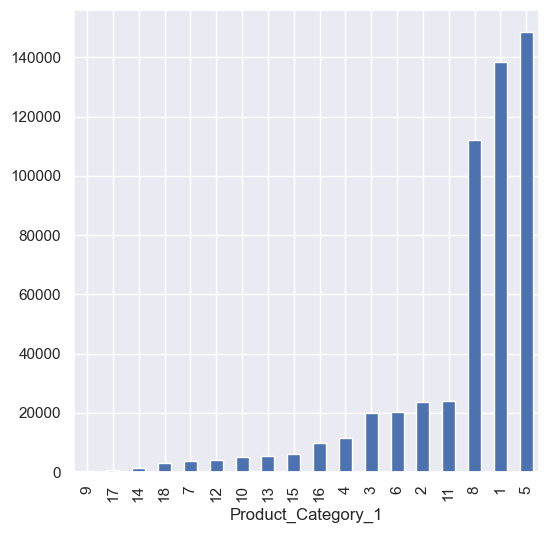

In [98]:
# Sorted Product Category 1 distribution
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

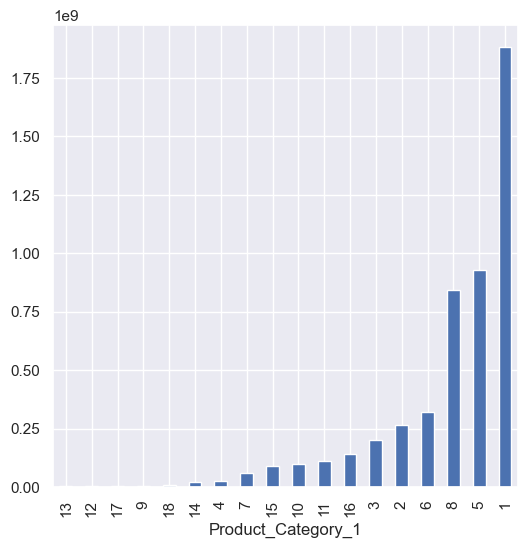

In [99]:
# total amount on Product Category 1 distribution according to purchase
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

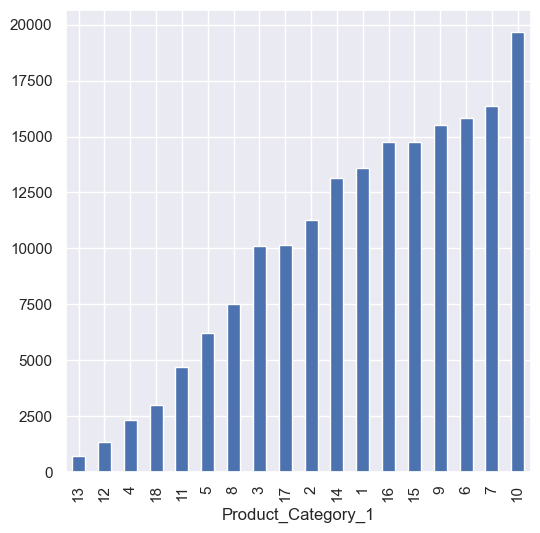

In [101]:
# Average amount on Product Category 1 distribution by purchases
df.groupby('Product_Category_1').mean(numeric_only=True)['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

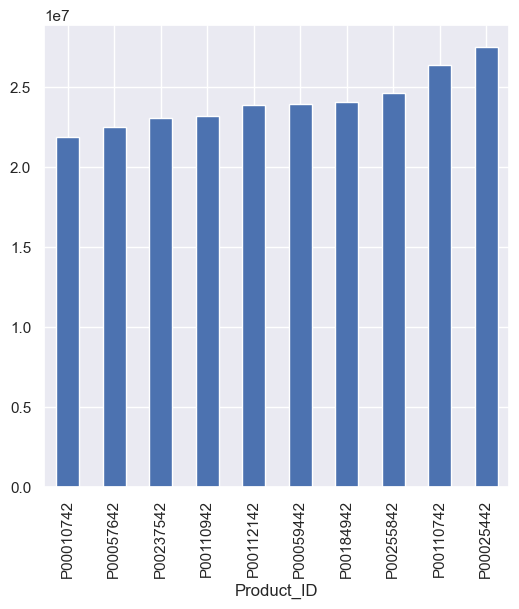

In [102]:
# Products with most common purchases
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

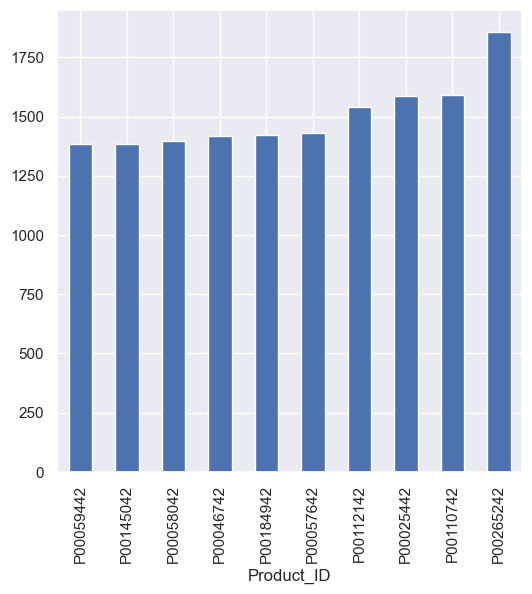

In [103]:
# Products amount with most common purchases
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

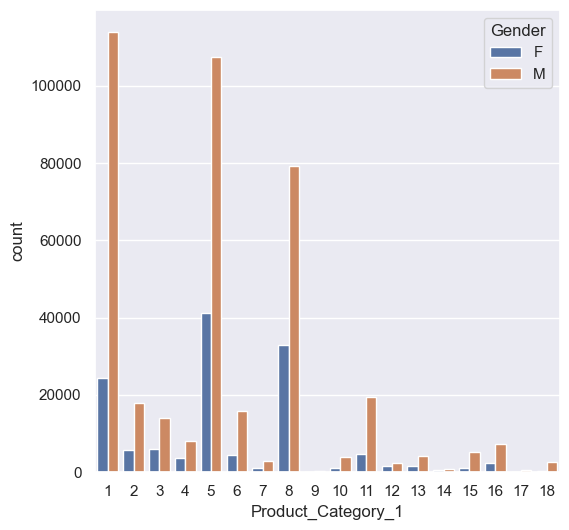

In [104]:
# Product Category 1 purchase by Gender
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

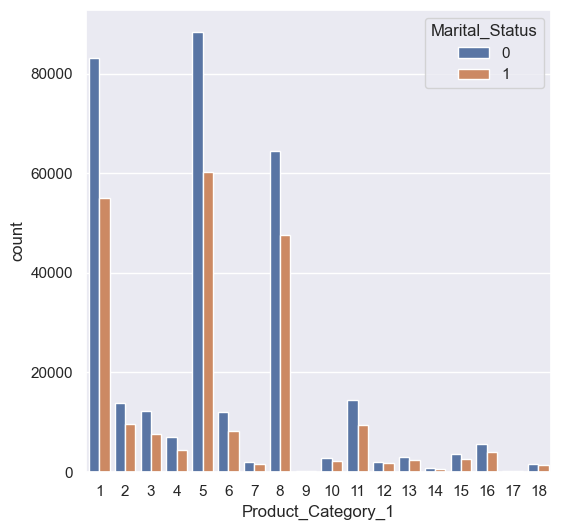

In [105]:
# Product Category 1 purchase by Marital Status
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

## Combining Gender and Marital Status

In [111]:
# Combining gender and marital status and making a new column to store that
l = []

for i in range(len(df)):
    l.append(df['Gender'][i] +'_'+ str(df['Marital_Status'][i]))
    
df['Marital_Gender'] = l

In [114]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

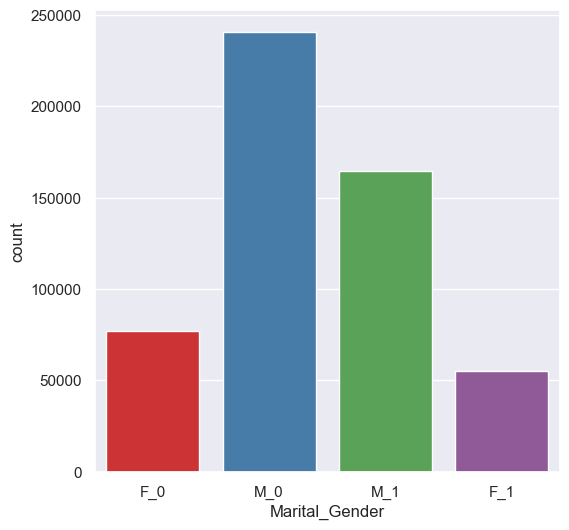

In [116]:
# counting total population acc. to Marital Gender
sns.countplot(x = df['Marital_Gender'], palette='Set1')

<Axes: xlabel='Age', ylabel='count'>

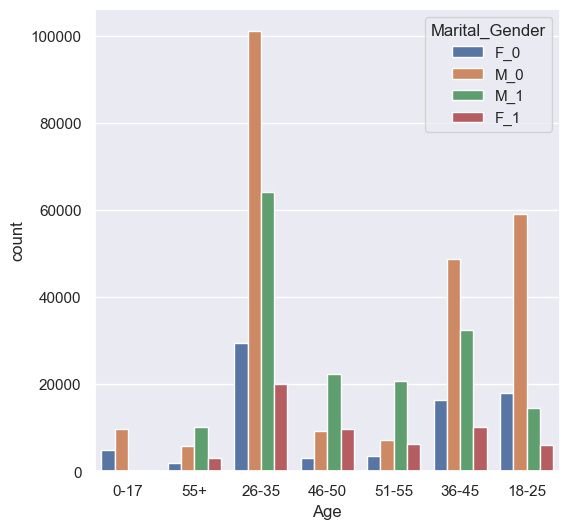

In [119]:
# plotting population acc. to age and marital gender
sns.countplot(x = df['Age'], hue=df['Marital_Gender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

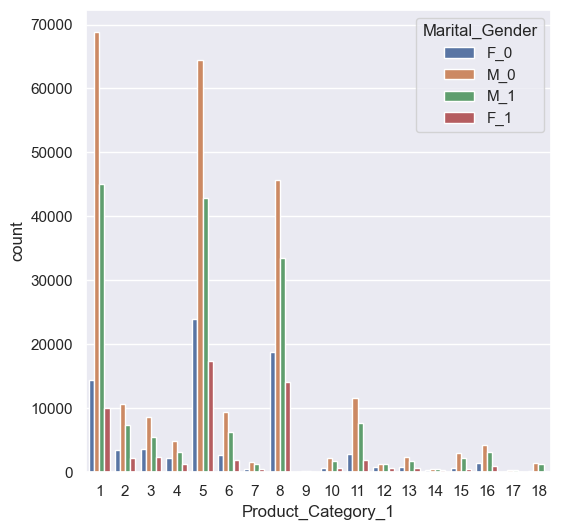

In [120]:
# total product purchased acc to marital gender
sns.countplot(x = df['Product_Category_1'], hue=df['Marital_Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

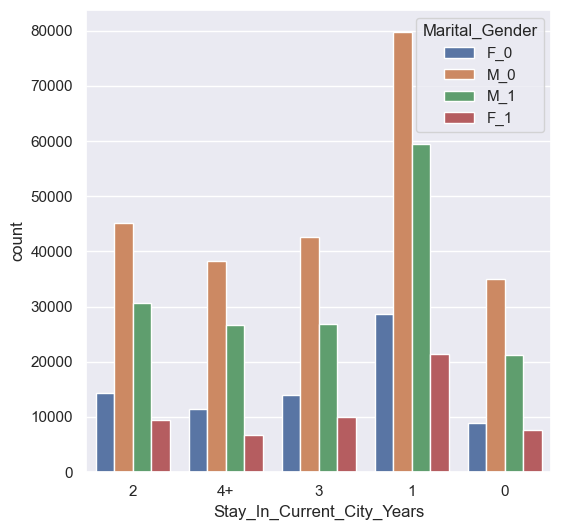

In [121]:
# total people staying in current city acc to marital gender
sns.countplot(x = df['Stay_In_Current_City_Years'], hue=df['Marital_Gender'])

<Axes: xlabel='City_Category', ylabel='count'>

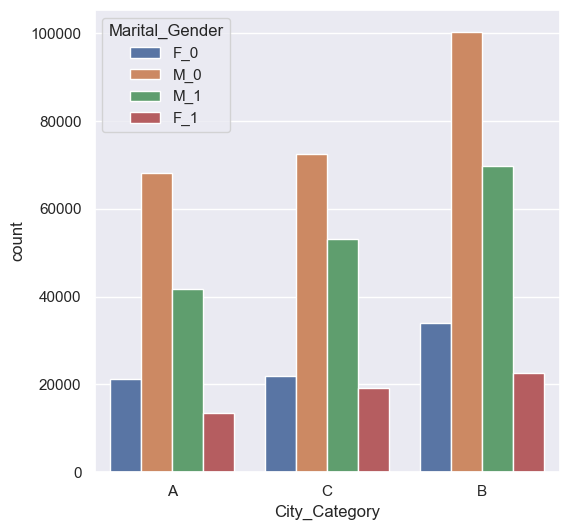

In [122]:
# people in each city category acc to marital gender
sns.countplot(x = df['City_Category'], hue=df['Marital_Gender'])

# Conclusion

## During the Black Friday Sales there are most purchases made by men, especially unmarried mens then comes the married mens then unmarried women and then married womens.